ARIMA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


/var/folders/b3/5wfl4st10qn70t4032t4vr8m0000gn/T/ipykernel_3566/3332479931.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('notebook/data/rossmann-store-sales/train.csv')


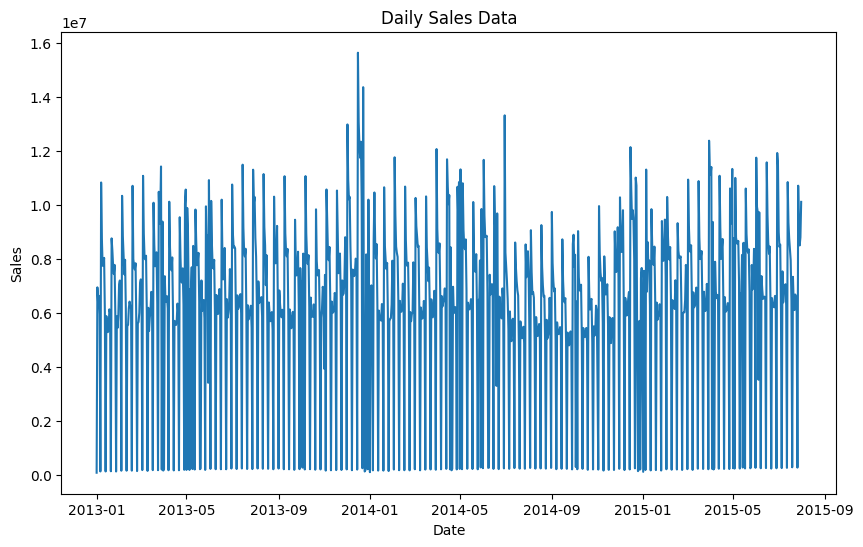

In [3]:
# Load the dataset
train_df = pd.read_csv('notebook/data/rossmann-store-sales/train.csv')

# Convert 'Date' to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Set 'Date' as index
train_df.set_index('Date', inplace=True)

# Resample the data to daily frequency and fill missing values (if any)
daily_data = train_df['Sales'].resample('D').sum().fillna(0)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(daily_data)
plt.title('Daily Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


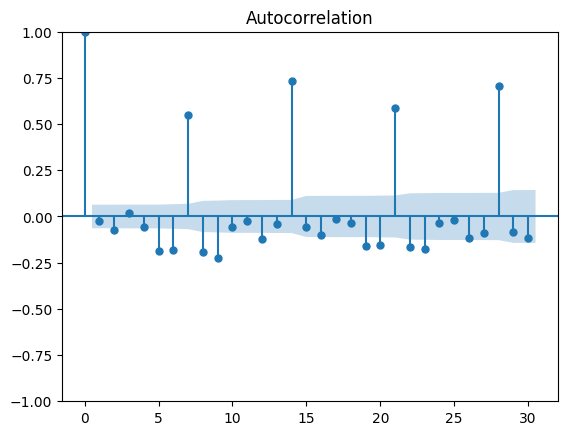

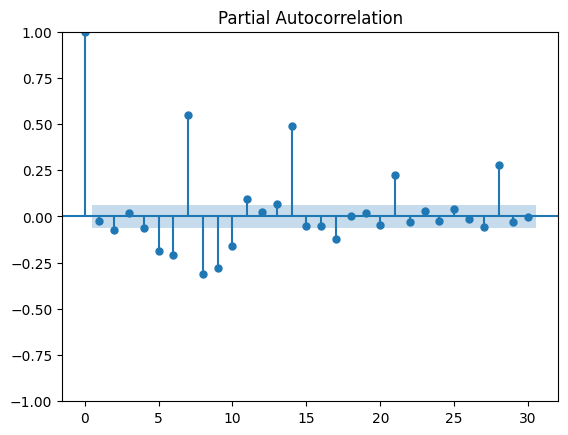

In [4]:
plot_acf(daily_data)
plt.show()

plot_pacf(daily_data)
plt.show()


In [5]:
# Fit the ARIMA model
model = ARIMA(daily_data, order=(5, 1, 0))  # Adjust (p, d, q) as needed
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  942
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -15520.158
Date:                Fri, 13 Sep 2024   AIC                          31052.316
Time:                        10:16:02   BIC                          31081.398
Sample:                    01-01-2013   HQIC                         31063.402
                         - 07-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7690      0.031    -25.074      0.000      -0.829      -0.709
ar.L2         -0.5980      0.046    -12.964      0.000      -0.688      -0.508
ar.L3         -0.3360      0.054     -6.279      0.0

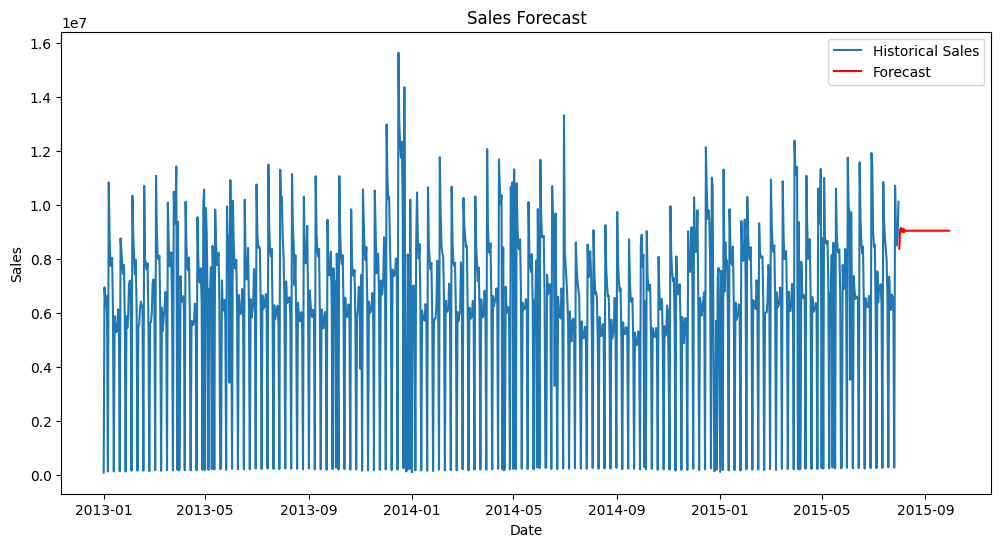

In [7]:
# Forecast future values
forecast_steps = 60  # Number of days to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecast
forecast_dates = pd.date_range(start=daily_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})
forecast_df.set_index('Date', inplace=True)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data, label='Historical Sales')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
